# Assigment 8 - Group 2

In [22]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }a
</style>
"""))

**Step 1**<br> Import packages

In [23]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt 
import chardet
import re
import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Point, LineString
import folium 
from folium import Marker, GeoJson
from folium.plugins import MarkerCluster, HeatMap
import re, json, requests

**Step 2**<br> Import denge DataBase

In [24]:
Denge_Data=pd.read_csv( r'../../_data/data_dengue_peru.csv', sep="," , dtype = object )
Denge_Data['Casos'] = Denge_Data['Casos'].astype('str')
Denge_Data['Casos'] = Denge_Data['Casos'].apply( lambda x: re.sub("""[',]""", "", x) )
Denge_Data['Casos'] = Denge_Data['Casos'].astype('float')
Denge_Data['Ubigeo'] = Denge_Data['Ubigeo'].astype('int64')
Denge_Data['Semana'] = Denge_Data['Semana'].astype('int64')
Denge_Data['Año'] = Denge_Data['Año'].astype('int64')
Denge_Data

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2.0
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,0.0
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2.0
...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN


**Step 3**<br> Generate ubigeo for Departments and Provinces

In [25]:
#Ubigeo Departamento
Denge_Data['Dep_ubigeo'] = Denge_Data['Ubigeo'].astype(str).str[-6]
Denge_Data['Dep_ubigeo']= Denge_Data['Dep_ubigeo'].fillna("0")
Denge_Data['Dep_ubigeo']=Denge_Data['Dep_ubigeo']+Denge_Data['Ubigeo'].astype(str).str[-5]
#Ubigeo Provincia
Denge_Data['Prov_ubigeo']=Denge_Data['Dep_ubigeo']+Denge_Data['Ubigeo'].astype(str).str[-4]+Denge_Data['Ubigeo'].astype(str).str[-3]
Denge_Data

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,Dep_ubigeo,Prov_ubigeo
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2.0,08,0809
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,1801
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,1801
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,0.0,08,0809
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2.0,08,0809
...,...,...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17,1702
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17,1703
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17,1702
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17,1703


**Step 4**<br> ShapeFile by distritict

In [26]:
#Number of cases by District
Distric_Num_Case_2021=Denge_Data.loc[Denge_Data['Año'] == 2021]
Distric_Num_Case_2021=Distric_Num_Case_2021.dropna()
Distric_Num_Case_2021['Casos'] = Distric_Num_Case_2021['Casos'].astype(int)
Distric_Num_Case_2021=pd.DataFrame(Distric_Num_Case_2021.groupby(["Ubigeo"])["Casos"].sum())
Distric_Num_Case_2021['Ubigeo'] = Distric_Num_Case_2021.index
Distric_Num_Case_2021 = Distric_Num_Case_2021.rename(columns = {'Ubigeo':'UBIGEO'}, inplace = False )
#Reindex
Distric_Num_Case_2021.index.names = ['']

Distric_Num_Case_2021


,Casos,UBIGEO
,,
10101,0,10101
10201,474,10201
10202,25,10202
10203,38,10203
10204,8,10204
...,...,...
250302,26,250302
250303,32,250303
250304,14,250304


<AxesSubplot:>

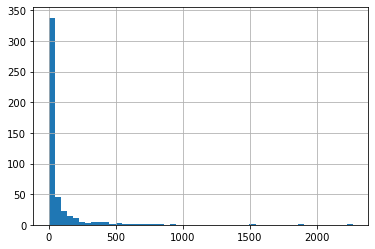

In [27]:
Distric_Num_Case_2021["Casos"].hist(bins=50)
#There is large ammount of cases 

In [28]:
#Open district ShapeFile
Distrit_maps = gpd.read_file(r'../../_data/LIMITE_DISTRITAL_2020_INEI/INEI_LIMITE_DISTRITAL.shp')
Distrit_maps

,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,CAPITAL,UBIGEO,IDPROV,CODIGO,CNT_CCPP,DESCRIPCIO,DESCARGAR,WHATSAPP,CONTACTO,geometry
0,06,CAJAMARCA,05,CONTUMAZA,04,GUZMANGO,GUZMANGO,060504,0605,060504,50,GUZMANGO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322..."
1,06,CAJAMARCA,11,SAN MIGUEL,05,EL PRADO,EL PRADO,061105,0611,061105,15,EL PRADO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969..."
2,06,CAJAMARCA,11,SAN MIGUEL,09,NIEPOS,NIEPOS,061109,0611,061109,41,NIEPOS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851..."
3,06,CAJAMARCA,11,SAN MIGUEL,10,SAN GREGORIO,SAN GREGORIO,061110,0611,061110,48,SAN GREGORIO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005..."
4,06,CAJAMARCA,12,SAN PABLO,03,SAN LUIS,SAN LUIS GRANDE,061203,0612,061203,9,SAN LUIS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,04,AREQUIPA,04,CASTILLA,04,CHACHAS,CHACHAS,040404,0404,040404,19,CHACHAS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8..."
1870,04,AREQUIPA,04,CASTILLA,05,CHILCAYMARCA,CHILCAYMARCA,040405,0404,040405,24,CHILCAYMARCA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-72.37490 -15.24990, -72.37494 -15.2..."
1871,04,AREQUIPA,04,CASTILLA,06,CHOCO,CHOCO,040406,0404,040406,58,CHOCO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-71.96976 -15.13597, -71.96952 -15.1..."
1872,04,AREQUIPA,04,CASTILLA,07,HUANCARQUI,HUANCARQUI,040407,0404,040407,25,HUANCARQUI,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-72.31258 -15.81426, -72.31211 -15.8..."


In [29]:
#Check unique values

Distrit_maps['UBIGEO'].is_unique

Distrit_maps['UBIGEO'].unique().size

1874

In [30]:
Distrit_maps = Distrit_maps[['UBIGEO', 'geometry']]
Distrit_maps['UBIGEO']=Distrit_maps['UBIGEO'].astype(str).astype(int)
Distrit_maps

C:\Users\Hans\anaconda3\envs\geogidahatari\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,UBIGEO,geometry
0,60504,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322..."
1,61105,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969..."
2,61109,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851..."
3,61110,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005..."
4,61203,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098..."
...,...,...
1869,40404,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8..."
1870,40405,"POLYGON ((-72.37490 -15.24990, -72.37494 -15.2..."
1871,40406,"POLYGON ((-71.96976 -15.13597, -71.96952 -15.1..."
1872,40407,"POLYGON ((-72.31258 -15.81426, -72.31211 -15.8..."


In [31]:
District_Dataset=pd.merge(Distrit_maps, Distric_Num_Case_2021, how="left", on=['UBIGEO'])
District_Dataset

,UBIGEO,geometry,Casos
0,60504,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322...",NaN
1,61105,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969...",NaN
2,61109,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851...",NaN
3,61110,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005...",NaN
4,61203,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098...",NaN
...,...,...,...
1869,40404,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8...",NaN
1870,40405,"POLYGON ((-72.37490 -15.24990, -72.37494 -15.2...",NaN
1871,40406,"POLYGON ((-71.96976 -15.13597, -71.96952 -15.1...",NaN
1872,40407,"POLYGON ((-72.31258 -15.81426, -72.31211 -15.8...",NaN


<AxesSubplot:>

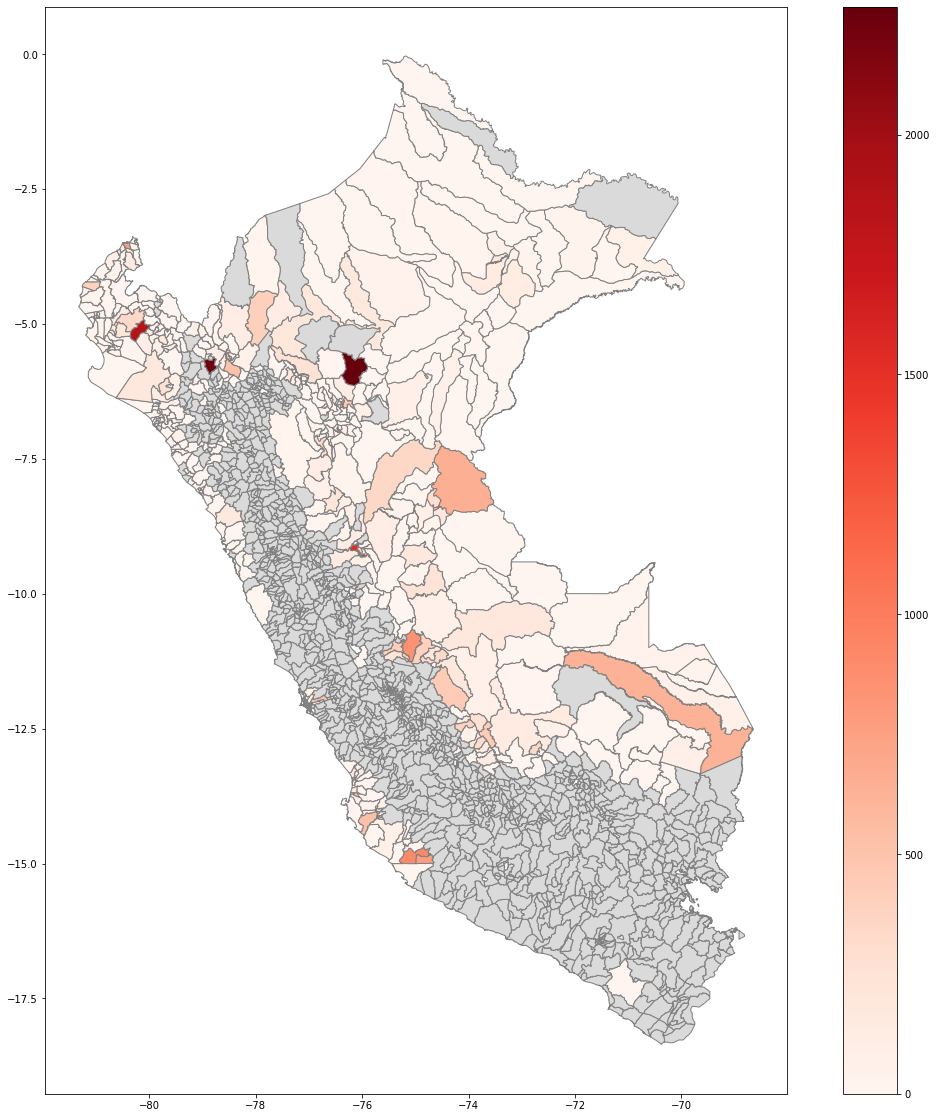

In [32]:
# Plot dengue infection at disctrict level 

District_Dataset.plot( column='Casos', cmap='Reds', 
          figsize=(20, 20),
          linestyle='-',
          edgecolor='gray',
          missing_kwds= dict(color = "#DADADB",),
          legend = True )

**Step 5**<br> ShapeFile by province

In [33]:
#Number of cases by Province
Province_Num_Case_2021=Denge_Data.loc[Denge_Data['Año'] == 2021]
Province_Num_Case_2021=Province_Num_Case_2021.dropna()
Province_Num_Case_2021['Casos'] = Province_Num_Case_2021['Casos'].astype(int)
Province_Num_Case_2021=pd.DataFrame(Province_Num_Case_2021.groupby("Prov_ubigeo")["Casos"].sum())

#
Province_Num_Case_2021['Prov_ubigeo'] = Province_Num_Case_2021.index
#Reindex
Province_Num_Case_2021.index.names = ['']
Province_Num_Case_2021

,Casos,Prov_ubigeo
,,
0101,0,0101
0102,676,0102
0103,0,0103
0104,435,0104
0107,719,0107
...,...,...
2403,72,2403
2501,1241,2501
2502,179,2502


In [49]:
#Open province ShapeFile
Province_maps = gpd.read_file(r'C:/Users/Hans/Downloads/INEI_LIMITE_PROVINCIAL_196_GEOGPSPERU_JUANSUYO_931381206/INEI_LIMITE_PROVINCIAL_196_GEOGPSPERU_JUANSUYO_931381206.shp')
Province_maps

,OBJECTID_1,OBJECTID,CCDD,NOMBDEP,CCPP,NOMBPROV,CAPITAL,IDPROV,Shape_STAr,Shape_STLe,ORIG_FID,Shape_Leng,Shape_Area,CONTACTO,CORREO,WHATSAPP,geometry
0,1,1.0,06,CAJAMARCA,12,SAN PABLO,SAN PABLO,0612,0.054396,1.255359,0,1.255359,0.054396,www.geogpsperu.com,juan.suyo@geogpsperu.com,931381206,"POLYGON ((-78.61088 -6.85360, -78.60956 -6.853..."
1,2,2.0,06,CAJAMARCA,13,SANTA CRUZ,SANTA CRUZ DE SUCCHABAMBA,0613,0.112930,2.001893,1,2.001893,0.112930,www.geogpsperu.com,juan.suyo@geogpsperu.com,931381206,"POLYGON ((-78.91404 -6.52169, -78.91269 -6.522..."
2,3,3.0,07,CALLAO,01,CALLAO,CALLAO,0701,0.011738,1.111221,2,1.111221,0.011738,www.geogpsperu.com,juan.suyo@geogpsperu.com,931381206,"POLYGON ((-77.13504 -11.81820, -77.13484 -11.8..."
3,4,4.0,08,CUSCO,02,ACOMAYO,ACOMAYO,0802,0.077836,1.626225,3,1.626225,0.077836,www.geogpsperu.com,juan.suyo@geogpsperu.com,931381206,"POLYGON ((-71.75329 -13.71072, -71.75275 -13.7..."
4,5,5.0,08,CUSCO,03,ANTA,ANTA,0803,0.162077,2.451407,4,2.451407,0.162077,www.geogpsperu.com,juan.suyo@geogpsperu.com,931381206,"POLYGON ((-72.34707 -13.30025, -72.34690 -13.3..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,202,192.0,14,LAMBAYEQUE,03,LAMBAYEQUE,LAMBAYEQUE,1403,0.784081,4.877186,191,4.877186,0.784081,www.geogpsperu.com,juan.suyo@geogpsperu.com,931381206,"POLYGON ((-79.88373 -5.49283, -79.88265 -5.494..."
192,203,193.0,15,LIMA,02,BARRANCA,BARRANCA,1502,0.114905,2.877107,192,2.877107,0.114905,www.geogpsperu.com,juan.suyo@geogpsperu.com,931381206,"POLYGON ((-77.73536 -10.32351, -77.73407 -10.3..."
193,204,194.0,15,LIMA,03,CAJATAMBO,CAJATAMBO,1503,0.126079,1.938107,193,1.938107,0.126079,www.geogpsperu.com,juan.suyo@geogpsperu.com,931381206,"POLYGON ((-76.90483 -10.27726, -76.90451 -10.2..."
194,205,195.0,15,LIMA,04,CANTA,CANTA,1504,0.143829,2.255792,194,2.255792,0.143829,www.geogpsperu.com,juan.suyo@geogpsperu.com,931381206,"POLYGON ((-76.56497 -11.31924, -76.56074 -11.3..."


In [50]:
#Check unique values

Province_maps['IDPROV'].is_unique

Province_maps['IDPROV'].unique().size

196

In [51]:
Province_maps = Province_maps.rename(columns={"IDPROV":"Prov_ubigeo"}, inplace=False)
Province_maps = Province_maps[['Prov_ubigeo', 'geometry']]
Province_maps

,Prov_ubigeo,geometry
0,0612,"POLYGON ((-78.61088 -6.85360, -78.60956 -6.853..."
1,0613,"POLYGON ((-78.91404 -6.52169, -78.91269 -6.522..."
2,0701,"POLYGON ((-77.13504 -11.81820, -77.13484 -11.8..."
3,0802,"POLYGON ((-71.75329 -13.71072, -71.75275 -13.7..."
4,0803,"POLYGON ((-72.34707 -13.30025, -72.34690 -13.3..."
...,...,...
191,1403,"POLYGON ((-79.88373 -5.49283, -79.88265 -5.494..."
192,1502,"POLYGON ((-77.73536 -10.32351, -77.73407 -10.3..."
193,1503,"POLYGON ((-76.90483 -10.27726, -76.90451 -10.2..."
194,1504,"POLYGON ((-76.56497 -11.31924, -76.56074 -11.3..."


In [52]:
Province_Dataset=pd.merge(Province_maps, Province_Num_Case_2021, how="left", on='Prov_ubigeo')
Province_Dataset

,Prov_ubigeo,geometry,Casos
0,0612,"POLYGON ((-78.61088 -6.85360, -78.60956 -6.853...",NaN
1,0613,"POLYGON ((-78.91404 -6.52169, -78.91269 -6.522...",0.0
2,0701,"POLYGON ((-77.13504 -11.81820, -77.13484 -11.8...",2.0
3,0802,"POLYGON ((-71.75329 -13.71072, -71.75275 -13.7...",NaN
4,0803,"POLYGON ((-72.34707 -13.30025, -72.34690 -13.3...",NaN
...,...,...,...
191,1403,"POLYGON ((-79.88373 -5.49283, -79.88265 -5.494...",680.0
192,1502,"POLYGON ((-77.73536 -10.32351, -77.73407 -10.3...",NaN
193,1503,"POLYGON ((-76.90483 -10.27726, -76.90451 -10.2...",NaN
194,1504,"POLYGON ((-76.56497 -11.31924, -76.56074 -11.3...",NaN


<AxesSubplot:>

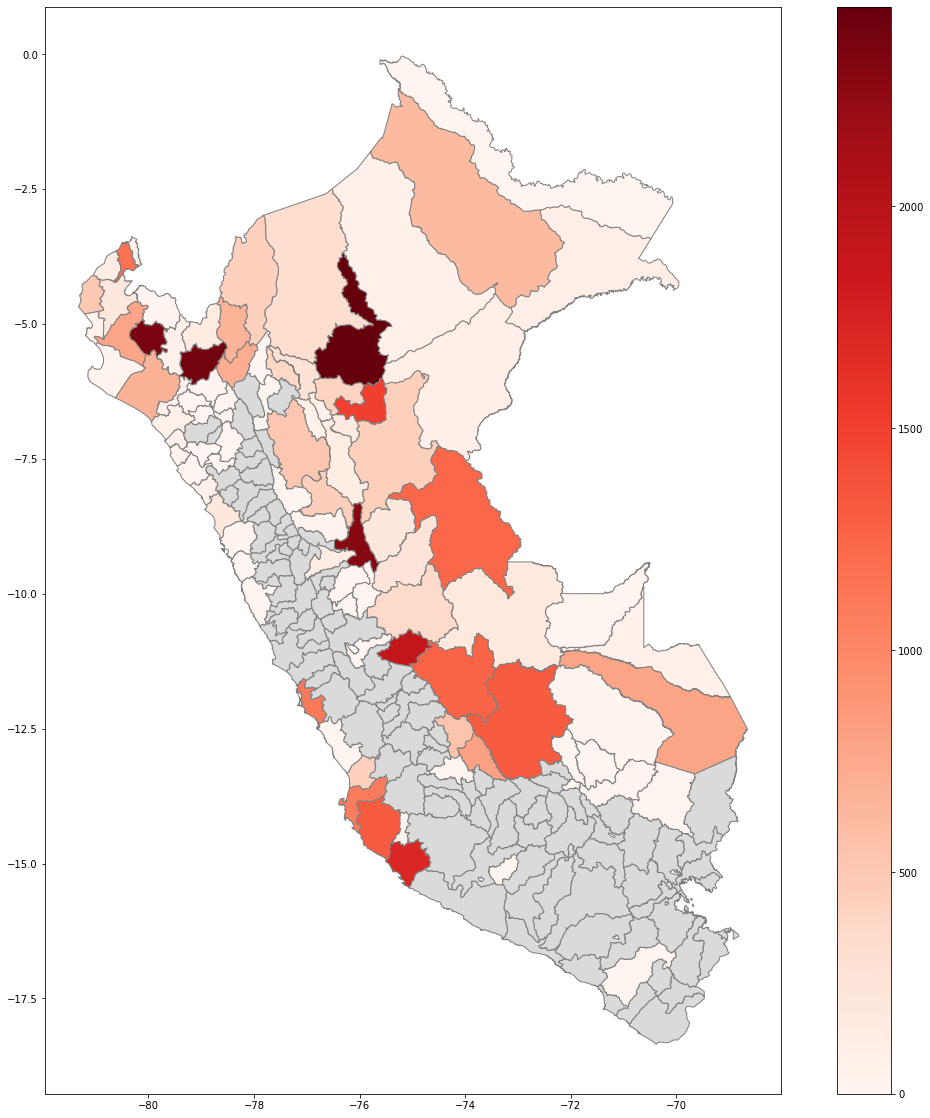

In [53]:
# Plot dengue infection at province level 

Province_Dataset.plot( column='Casos', cmap='Reds', 
          figsize=(20, 20),
          linestyle='-',
          edgecolor='gray',
          missing_kwds= dict(color = "#DADADB",),
          legend = True )

**Step 6**<br> ShapeFile by Departament | Cases by year

In [ ]:
#Number of cases by Departament
Dep_Num_Case=Denge_Data
Dep_Num_Case['Casos'] = Dep_Num_Case['Casos'].astype(float)
Dep_Num_Case=pd.DataFrame(Dep_Num_Case.groupby(["Año", "Dep_ubigeo"], as_index=False)["Casos"].sum())
Dep_Num_Case

In [ ]:
#Open province ShapeFile
Department_maps = gpd.read_file(r'../../_data/INEI_LIMITE_DEPARTAMENTAL/INEI_LIMITE_DEPARTAMENTAL.shp')
Department_maps

In [ ]:
#Check unique values

Department_maps['CCDD'].is_unique
Department_maps['CCDD'].unique().size

In [ ]:
Department_maps = Department_maps.rename(columns={"CCDD":"Dep_ubigeo"}, inplace=False)
Department_maps = Department_maps[['Dep_ubigeo', 'geometry']]
Department_maps

In [ ]:
Departament_DataBase=pd.merge(Department_maps,Dep_Num_Case, how="right", on="Dep_ubigeo")
Departament_DataBase

In [ ]:
fig, axis = plt.subplots( nrows = 3, ncols= 3, figsize = ( 15, 15 ) )

idx = 0
for i in range( 3 ):
    for j in range ( 3 ):
        
        if ( idx < 7 ) : 
        
            ax = axis[ i ][ j ]
            Año = Departament_DataBase.Año.unique()[ idx ]
            df6 = Departament_DataBase[ Departament_DataBase.Año == Año ]
        
            df6.plot( column='Casos', 
                      cmap='Reds', 
                      linestyle='--',
                      edgecolor='black', 
                      legend = True, 
                      missing_kwds= dict(color = "#DADADB",),
                      ax = ax 
                    )
        
            ax.set_title( Año )
        
        idx = idx + 1

**Step 7**<br> ShapeFile by Departament <br> Cases by quarter 2021

In [ ]:
#Number of cases by Departament
Dep_Num_Case=Denge_Data.loc[Denge_Data["Año"]==2021]
Dep_Num_Case['quarter'] = (( Dep_Num_Case['Semana']-1) // 13 ) + 1
Dep_Num_Case.loc[Dep_Num_Case.quarter == 5, 'quarter'] = 4
Dep_Num_Case

In [ ]:
data_dpto_2021 = Dep_Num_Case.groupby(['Dep_ubigeo', 'quarter']).sum().reset_index().copy()
data_dpto_2021

In [ ]:
dataset_quarter = pd.merge(Department_maps,data_dpto_2021, how="right", on="Dep_ubigeo")
dataset_quarter